# Assignment 1: PCA

## Note
* Use Google Colab to do this assignment. (File > Open in playground mode)
* Don't change existing code or text.
* Add code and write text as instructed.

## Submission
* File > Download > (as .ipynb)
* Submit .ipynb file on the Learn.  

## Submission Notes
I have attached pictures of handwritten notes in this notebook for ans 1. 
I'll also be attaching the images separately on learn in case there are any issues.

# [NO MARKS] PCA Warming Up (MUST READ)

Some code to illustrate examples of PCA using sklearn library.

**Let's create some random `5d` data**

In [1]:
import numpy as np
from sklearn.decomposition import PCA

# 100 points of 5d data
data = np.random.rand(100, 5)

**Lets convert this `5d` data to `2d` using `PCA`**


In [2]:
# n_components=2 because I want to convert 5d data to 2d i.e, d=5 and k=2 based on the notation in Tutorial.
pca = PCA(n_components=2)
pca.fit(data)

PCA(n_components=2)

In code above when we call `fit`, it populates two things in `pca`:
1. `mean_`
2. `components_`

In [3]:
# mean of the input data (per dimension) used to zeroying the mean
pca.mean_

array([0.50484231, 0.53341466, 0.46462925, 0.5025741 , 0.48551164])

In [4]:
# basis vectors: k by d projection marix (this is the transposed of projection matrix based on notation in the Tutorial.)
pca.components_

array([[-0.32719993,  0.71359455,  0.50709213,  0.33019674, -0.13247907],
       [ 0.58204828,  0.58944071, -0.51154505, -0.00306353, -0.22823614]])

Now we are ready to transform `5d` from `data` into `2d` using following code

In [5]:
data_to_reduce = data[:10]
reduced_data = np.dot(data_to_reduce - pca.mean_, pca.components_.T)

# reduced data from 5d to 2d
reduced_data.shape

(10, 2)

You can accomplish the same using `transform` function provided in `pca`

In [6]:
pca.transform(data_to_reduce).shape

(10, 2)

Time for inverse transform or changing `2d` data back to `5d`

Compression --> Decompression

In [7]:
decompressed_data = np.dot(reduced_data, pca.components_)+pca.mean_
decompressed_data

array([[0.20140742, 0.37904864, 0.76343561, 0.55224163, 0.56633219],
       [0.28910343, 0.23203834, 0.63682049, 0.47765125, 0.59079668],
       [0.20597567, 0.35559693, 0.75352201, 0.54339142, 0.57154813],
       [0.15920466, 0.01051271, 0.73208208, 0.45005114, 0.66418843],
       [0.64685129, 0.21907846, 0.24357269, 0.35781   , 0.54416399],
       [0.78682239, 0.36958227, 0.12239549, 0.35982536, 0.48709278],
       [0.13613257, 0.7132515 , 0.9049012 , 0.67841951, 0.49202574],
       [0.76625274, 0.697517  , 0.21374311, 0.46956626, 0.40811911],
       [0.32505675, 0.78394774, 0.71351961, 0.63950655, 0.44804803],
       [0.44561396, 0.20977763, 0.46129369, 0.42000683, 0.57453593]])

In [8]:
# same can we accomplished using inverse_transform
pca.inverse_transform(pca.transform(data_to_reduce))

array([[0.20140742, 0.37904864, 0.76343561, 0.55224163, 0.56633219],
       [0.28910343, 0.23203834, 0.63682049, 0.47765125, 0.59079668],
       [0.20597567, 0.35559693, 0.75352201, 0.54339142, 0.57154813],
       [0.15920466, 0.01051271, 0.73208208, 0.45005114, 0.66418843],
       [0.64685129, 0.21907846, 0.24357269, 0.35781   , 0.54416399],
       [0.78682239, 0.36958227, 0.12239549, 0.35982536, 0.48709278],
       [0.13613257, 0.7132515 , 0.9049012 , 0.67841951, 0.49202574],
       [0.76625274, 0.697517  , 0.21374311, 0.46956626, 0.40811911],
       [0.32505675, 0.78394774, 0.71351961, 0.63950655, 0.44804803],
       [0.44561396, 0.20977763, 0.46129369, 0.42000683, 0.57453593]])

In [9]:
# Lets find compression decompression error (absolute mean error)
np.sum(np.abs(data_to_reduce - decompressed_data))/data_to_reduce.size

0.1340424455733873

# PCA 


## Problem 1: PCA objective function [35 marks]


## 1-a) [10 marks]
Show that minimizing the reconstruction loss in PCA i.e,

\begin{equation}
\begin{aligned}
& \underset{\mathbf{W}}{\text{arg min}} &&   \| \mathbf{X}-\mathbf{X}\mathbf{W}\mathbf{W}^T \| ^2_F,  \quad \mathbf{W}^T \mathbf{W}=\mathbf{I}_k, \quad (1)
\end{aligned}
\end{equation}

is equivalent to maximizing variance in all orthogonal projction directions i.e,

$$
\underset{\mathbf{W}}{\text{arg max}} \quad \textrm{Tr}\{\mathbf{W}^{T}\mathbf{X}^{T}\mathbf{X}\mathbf{W}\}\quad
\textrm{s.t.} \quad  \mathbf{W}^T \mathbf{W}=\mathbf{I}_k, \quad (2)
$$
where $ \textrm{Tr}$ is trace function, $\| .\|_F$ is frobenius norm, $\mathbf{X}$ is $n$ by $d$ data matrix ($n$ number of data points and $d$ dimensionality), $\mathbf{W}$ is a $d$ by $k$  projection matrix, and $\mathbf{I}_k$ is $k$ by $k$ identity matrix.

Hint 1: Try to expand the frobenus norm in relation (1) and note that $\mathbf{W}^T \mathbf{W}=\mathbf{I}_k$.

Hint 2: In order to show this you may use Trace of a product and Cyclic property of the Trace function. You can read about Cyclic property of Trace function [here](https://en.wikipedia.org/wiki/Trace_(linear_algebra)). <br>
<br>


Answer to 1-a):
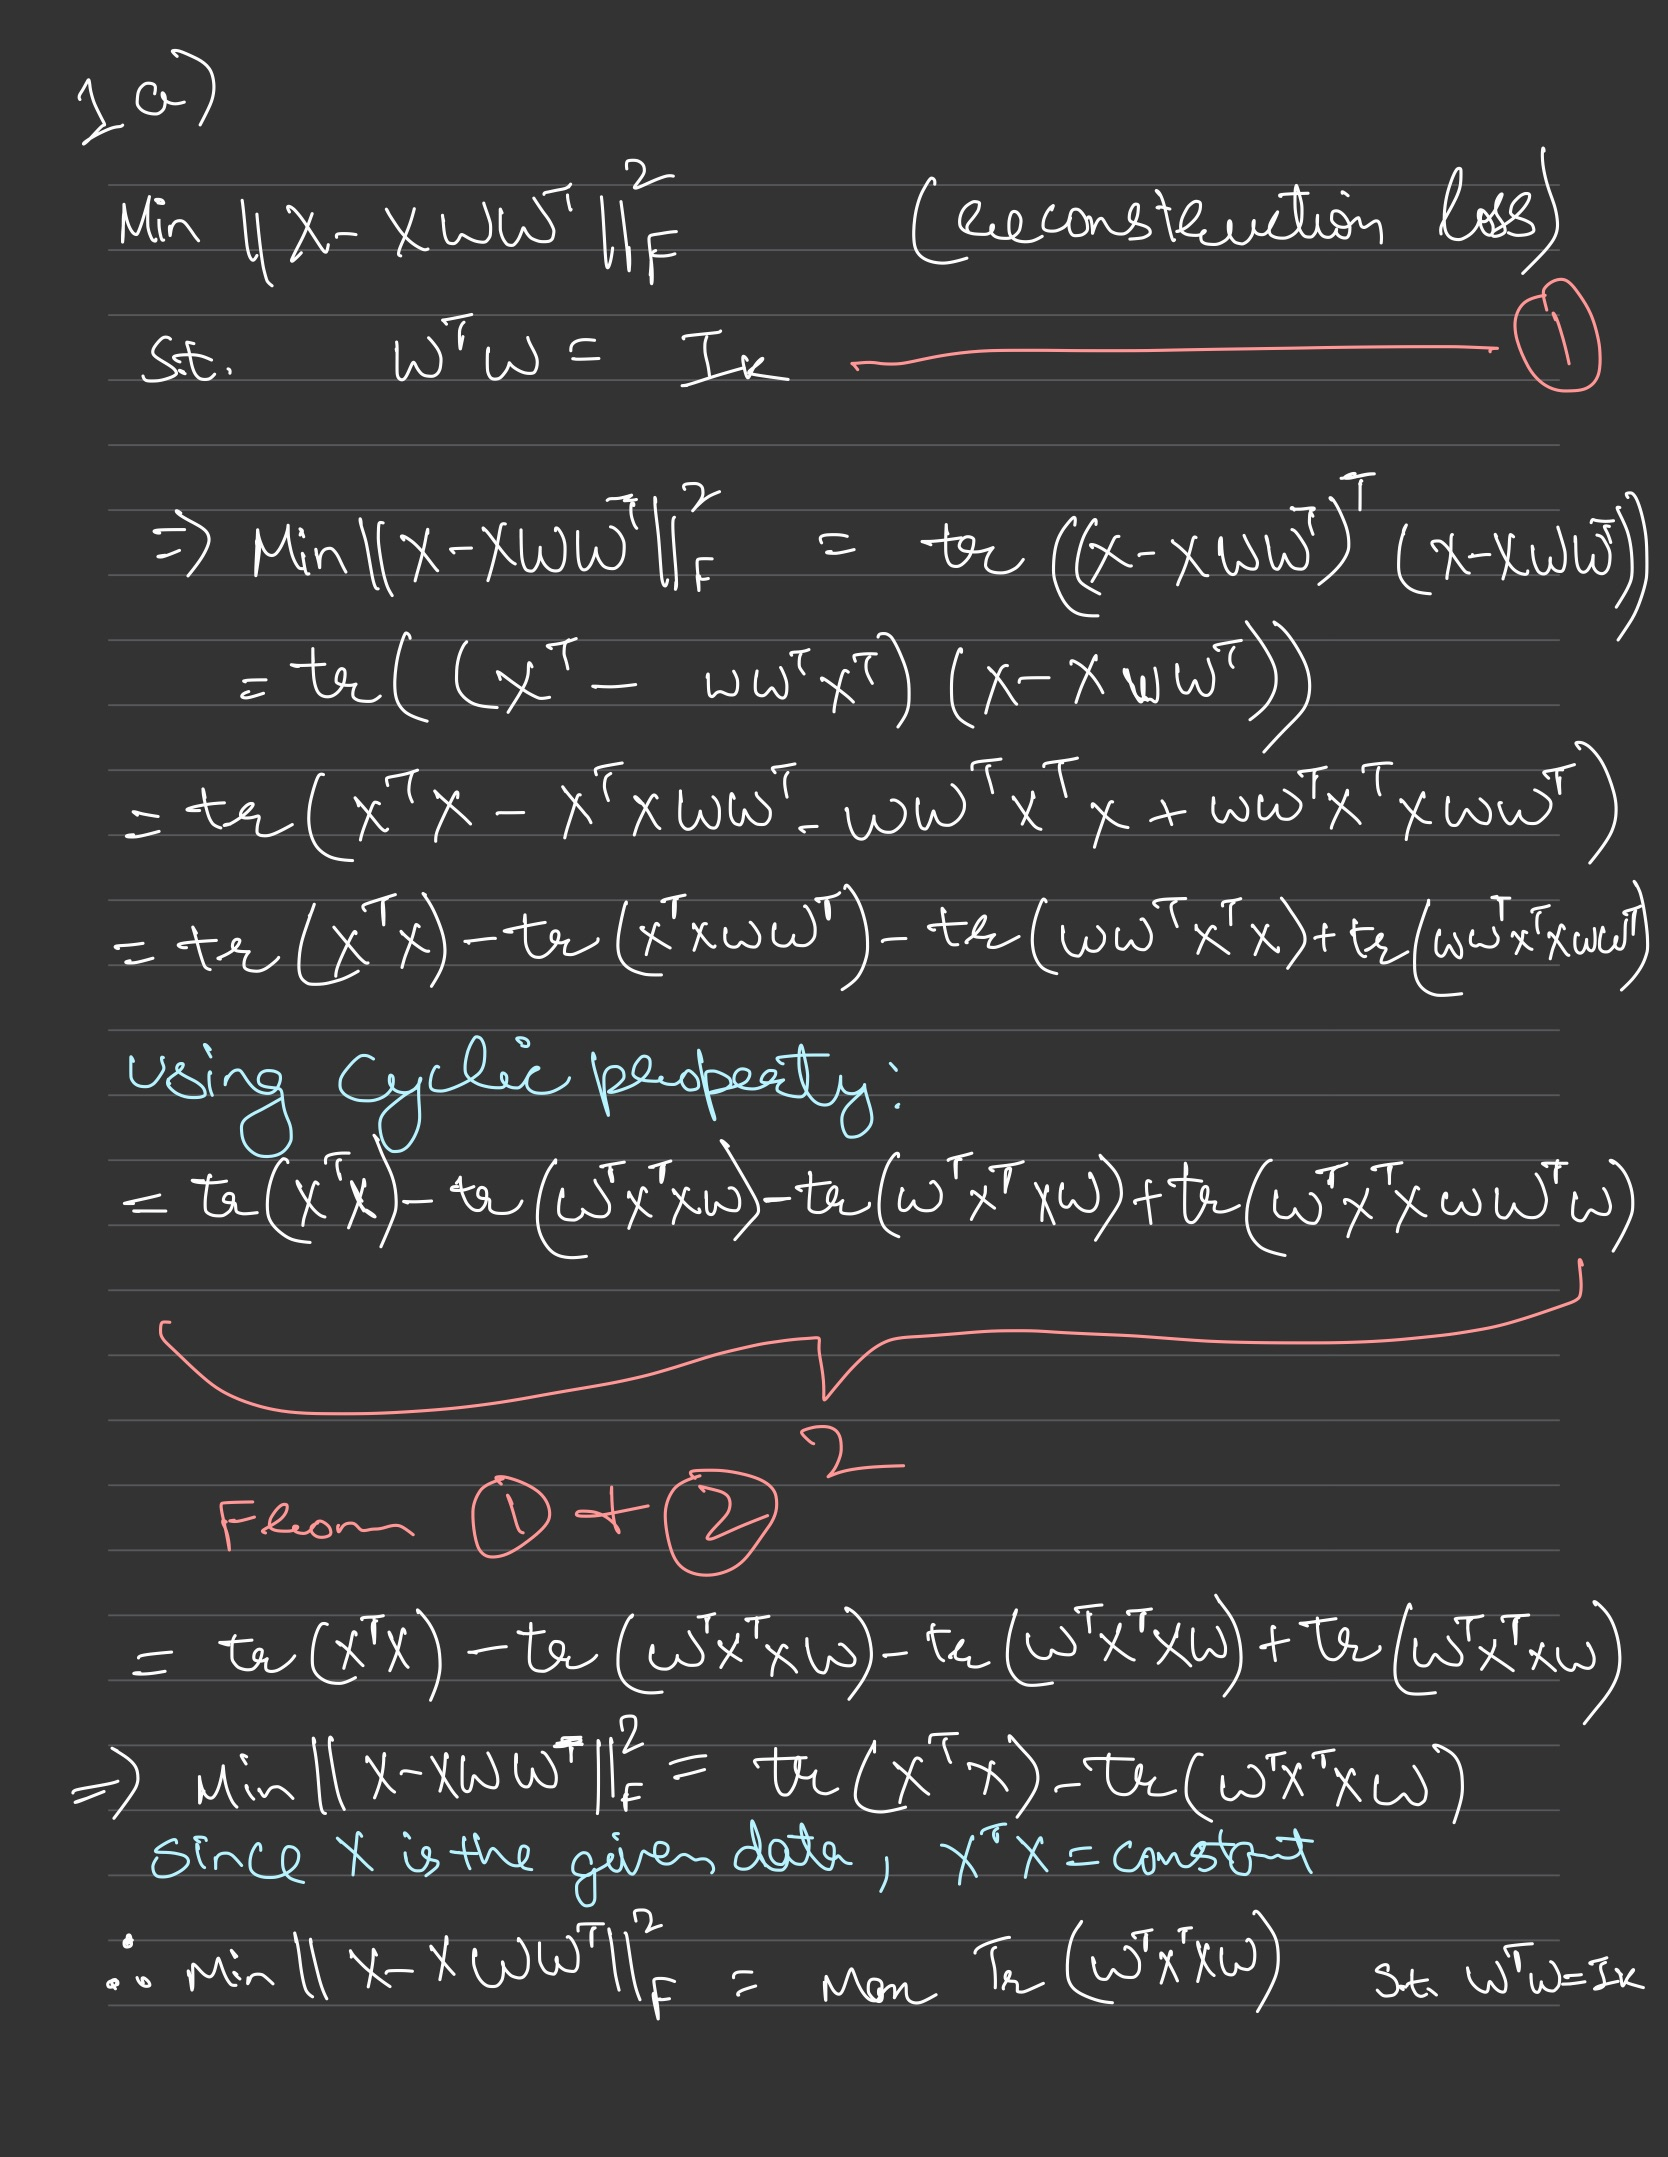

## 1-b) [10 marks]
Show that projection matrix in PCA i.e, $\mathbf{W}$ is rotation invariant .
Hint: You need to show that if we replace $\mathbf{W}$ with $\mathbf{W}\mathbf{R}$ where $\mathbf{R}$ is a $k$ by $k$ rotation matrix (rotation matrix is a square orthohonal matrix such that $\mathbf{R}^T\mathbf{R}=\mathbf{R}\mathbf{R}^T=\mathbf{I}_k$) then the objective value in relation (2) is the same.

Hint: In order to show this you may use Trace of a product and Cyclic property of the Trace function. You can read about Cyclic property of Trace function [here](https://en.wikipedia.org/wiki/Trace_(linear_algebra)).

Answer to 1-b):

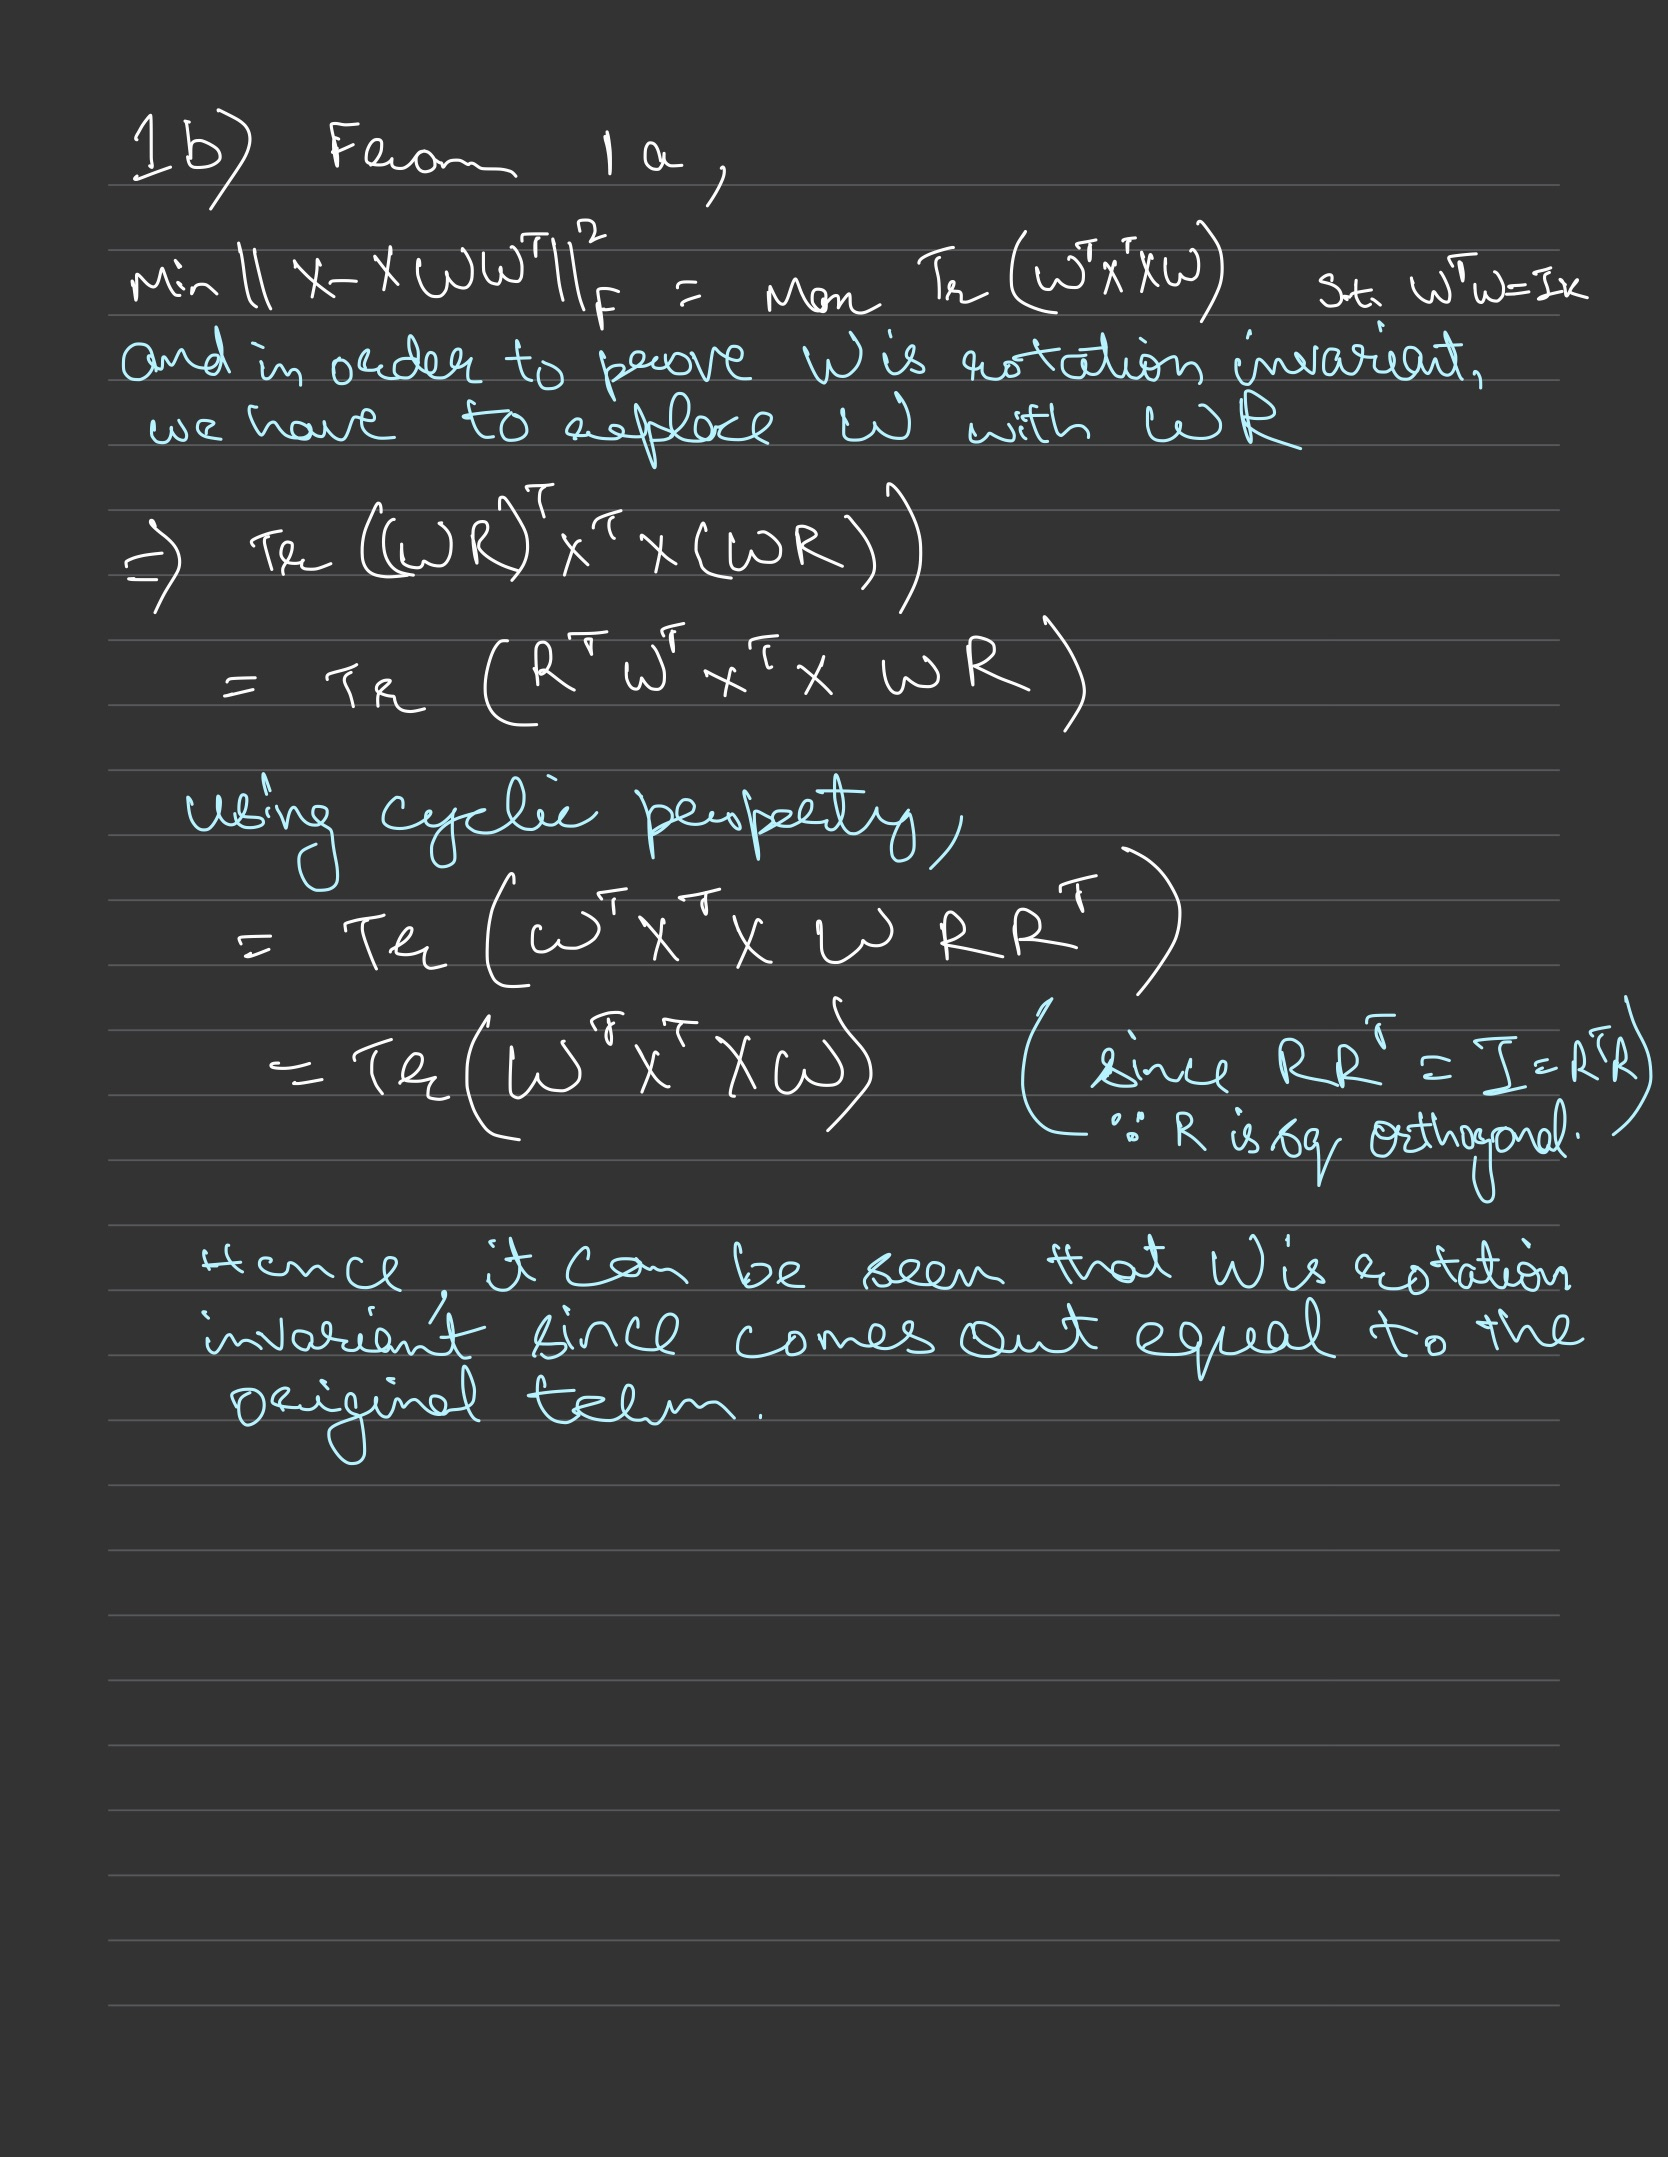

## 1-c) [10 marks] 
Assume we have the data matrix 
$\mathbf{X}$ $n$ by $d$  ($n$ number of data points and $d$ dimensionality), and the projection martix $\mathbf{W}$ ($d$ by $k$) from PCA algorithm. Explain in detail how we can use this $\mathbf{W}$ to denoise $\mathbf{X}$? <br>

write the mathematical exparession for calcuating the denoised data and explain role of $k$ in denoising.

Answer to 1-c):
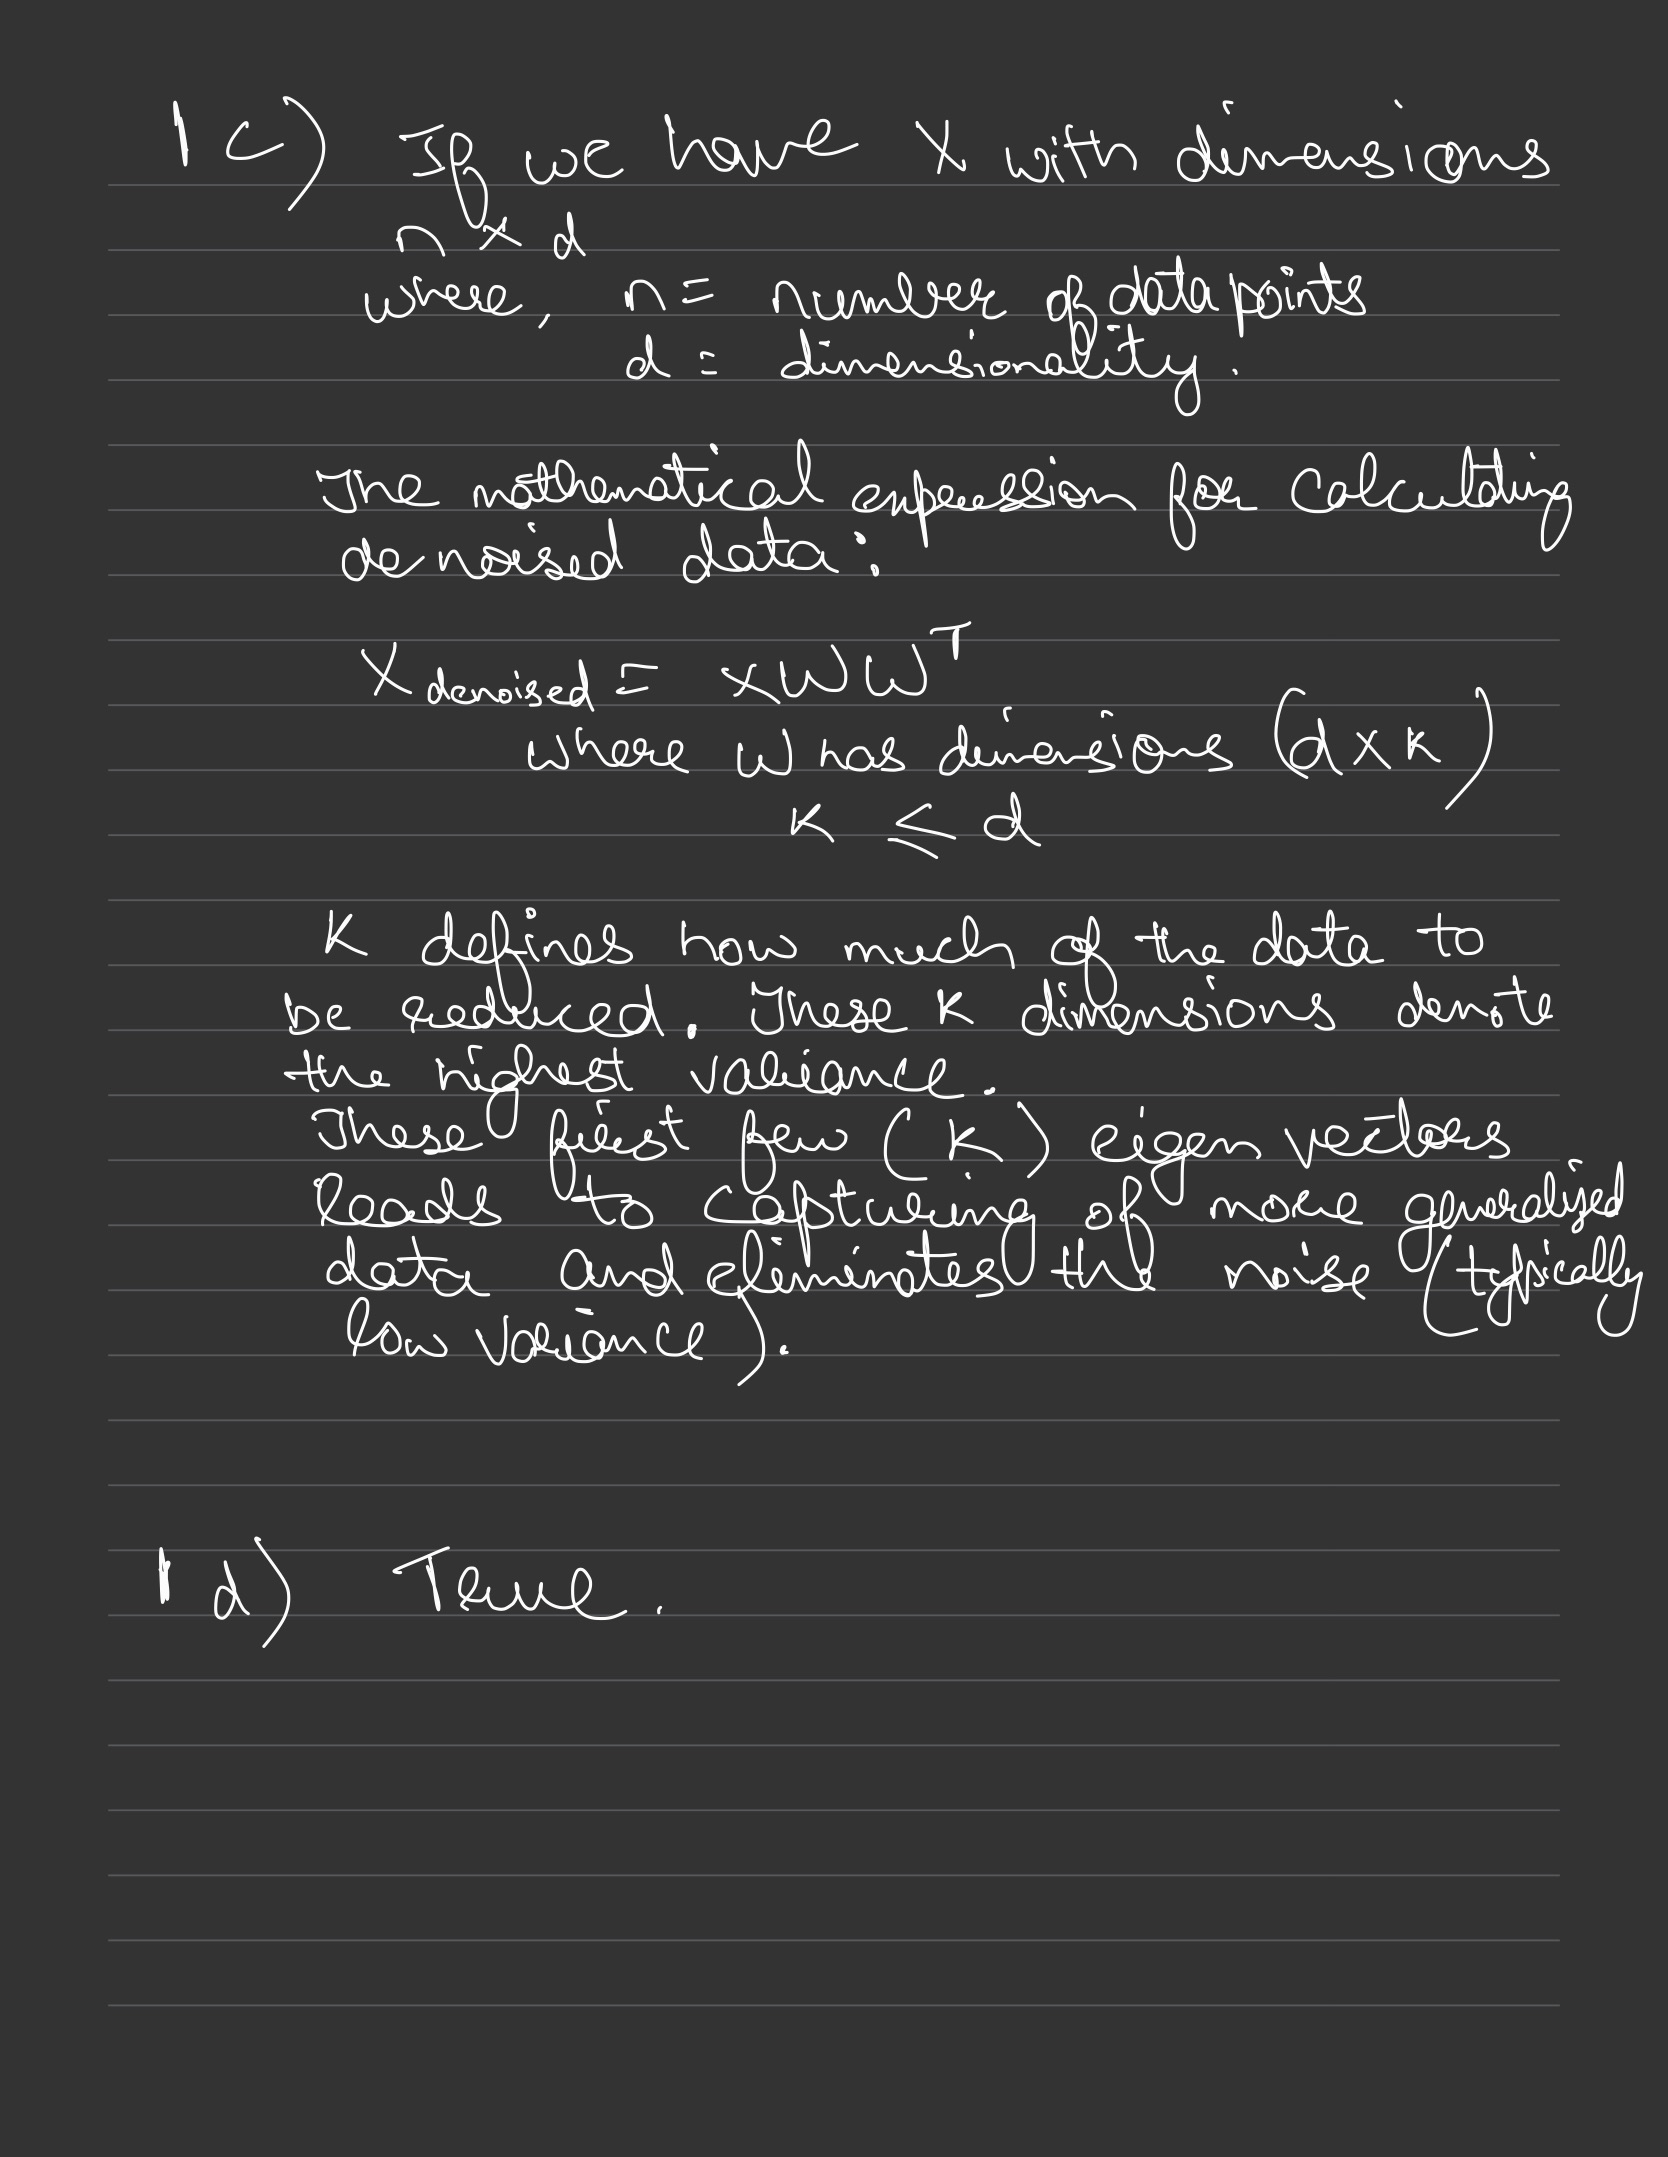

## 1-d) [5 marks] 
For a $d$ dimensional data, you can ALWAYS reconstruct the data with 0\% error if all $d$ PCAs are used. In other words if we set $k$ equal to $d$ in the relation (1) we can obtain a $\mathbf{W}$ such that the reconstruction loss $\| \mathbf{X}-\mathbf{X}\mathbf{W}\mathbf{W}^T \| ^2_F$ is zero.

- True
- False

Answer to 1-d): True.

## Problem 2: Visualize eigenvectors in face dataset: Eigenfaces [35 marks]

We know that $k$ columns of projection matrix $\mathbf{W}$ where $\mathbf{W}$ is $d$ by $k$ ($d$ original dimenionality and $k$ dimensionality of projected data) or equally top $k$ eigenvectors associated with $k$ largest eigenvalues of covariance matrix show projection directiond with highest variances. <br>

In this question, we want to apply PCA on face dataset and visulize the the columns of projection matrix (principal components) as face images.



The following code load the face dataset:

In [10]:
from sklearn.datasets import fetch_lfw_people
faces = fetch_lfw_people(min_faces_per_person=60)
print(faces.images.shape)

(1348, 62, 47)


Clearly there are 1348 images each with the size of (62,47). The following code plot the first 7 images in this dataset:

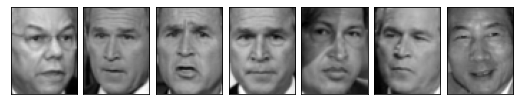

In [11]:
# Plot the images
import matplotlib.pyplot as plt
fig, ax = plt.subplots(1, 7, figsize=(9, 5),
                       subplot_kw={'xticks':[], 'yticks':[]},
                       gridspec_kw=dict(hspace=0.1, wspace=0.1))
for i in range(7):
    ax[i].imshow(faces.images[i], cmap='binary_r')

## 2-a) [5 marks]
Use reshpe metod to reshpe this data from (1348, 62, 47)
to (1348, 2914) such that X is the reshaped data:


In [12]:
#write your code here to reshape the data
import numpy as np

face_reshaped = faces.images.reshape(1348, 2914)
print(face_reshaped.shape)

(1348, 2914)


## 2-b) [5 marks]
Import PCA from sklearn and fit your model on X dataset using 150 principal components.

In [13]:
# write your code here
from sklearn.decomposition import PCA
pca = PCA(n_components=150)
pca.fit(face_reshaped)

PCA(n_components=150)

##2-c) [5 marks]
The components_ attribute return the projection matrix in $k$ by $d$ format i.e, each row is an eigenvector. Choose the first eigenvector of the covariance matrix (first row in of projection matrix extracted by components_ attribute), this should be a 1 by $d$ (here 1 by 2914) vector.

Try to reshape it to a (62 by 47) matrix and visualize it as a grey scalse image.

Hint: use plt.imshow("your image here", cmap='bone') to visualize this eigenvector (eigenface).

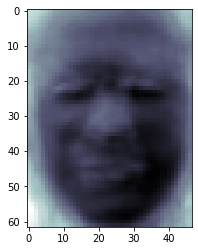

In [14]:
# Write you code here
first_eigenV = pca.components_[0,]
first_eigenV = first_eigenV.reshape(62,47)
plt.imshow(first_eigenV,cmap = 'bone');

##2-d) [5 marks]
Please explain your intuition about the viuslized eigenvector as an image in 2-3 lines. What does it mean? What does it look like?

Write your answer to 2-d here:

As we know that the eigenfaces are arranged in a way that the first few components (or faces) are ordered in terms of importance. As it can be seen from the visualization above, the first eigen face captures the important features such as the shape of the face, nose, eyes, etc. It can also carry the information regarding the lighting conditions.  

## 2-e) [5 marks]
Use plt.subplots to visualize the first 50 eigenfaces. Visualize them in a 5 by 10 array of eigenfaces using subplots.

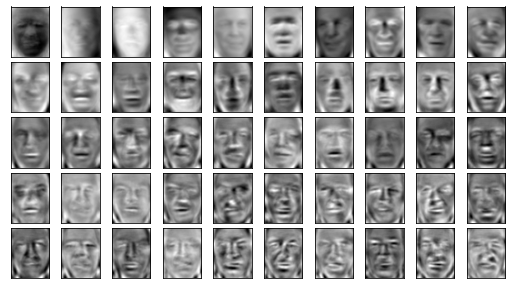

In [15]:
# write your code here to Plot the first 50 eigenfaces
eigen_vectors = pca.components_
eigen_vectors = eigen_vectors.reshape(150,62,47)
fig, ax = plt.subplots(5, 10, figsize=(9, 5),subplot_kw={'xticks':[], 'yticks':[]},gridspec_kw=dict(hspace=0.1, wspace=0.1))
for i in range(50):
  ax[i//10,i%10].imshow(eigen_vectors[i], cmap='binary_r')

## 2-f) [5 marks]
Repeat part 2-b but this time with 1348 components. Then
use plt.subplots to visualize the **last** 50 eigenfaces. Visualize them in a 5 by 10 array of eigenfaces.

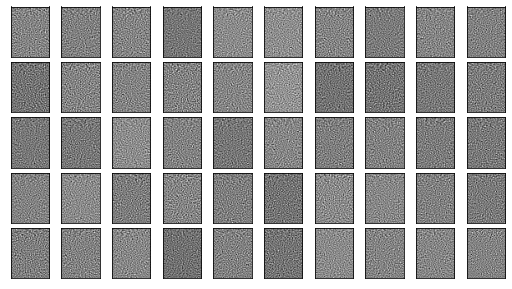

In [16]:
# write your code here to Plot the last 50 eigenfaces
pca_1348 = PCA(n_components=1348)
pca_1348.fit(face_reshaped)
eigen_vectors_1348 = pca_1348.components_
eigen_vectors_1348 = eigen_vectors_1348.reshape(1348,62,47)
fig, ax = plt.subplots(5, 10, figsize=(9, 5),subplot_kw={'xticks':[], 'yticks':[]},gridspec_kw=dict(hspace=0.1, wspace=0.1))
for i in range(50):
  ax[i//10,i%10].imshow(eigen_vectors_1348[i+1298,], cmap='binary_r')

##2-g) [5 marks]
Please explain your intuition about the viuslized eigenfaces in 2-3 lines. what do they mean? why do they looklike?

Write your answer to 2-g here:
in the last few eigen faces we can not see a very defined shapes. As per the PCA tutorials, the last few components are the least important. It can mainly consist of the noise or some features that are very specific to a very few (or a single) images. Generally these last few component can be discarded to reduce the dimensionality of the data.

## Problem 3: Denoising by PCA [10 marks]

Run the following cell to load and visualize the faces again:

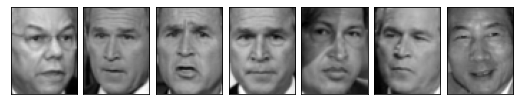

In [17]:
from sklearn.datasets import fetch_lfw_people
import matplotlib.pyplot as plt

faces = fetch_lfw_people(min_faces_per_person=60)
# Plot the images
fig, ax = plt.subplots(1, 7, figsize=(9, 5),
                       subplot_kw={'xticks':[], 'yticks':[]},
                       gridspec_kw=dict(hspace=0.1, wspace=0.1))
for i in range(7):
    ax[i].imshow(faces.images[i], cmap='binary_r')

Use reshpe metod to reshpe this data from (1348, 62, 47)
to (1348, 2914) such that X is the reshaped data:


In [18]:
#write your code here to reshape the data
import numpy as np

X = faces.images.reshape(1348, 2914)
print(X.shape)

(1348, 2914)


##3-a) [5 marks]
Generate a random matrix sampled from normal distribution with mean equal to 1 and standard deviation equal to 20 with the size of X. Name this matrix noise and add this to the X to get noisy_X. Then run the cell to visualize some of the noisy images.

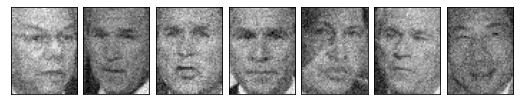

In [19]:
# write your code here
noise=np.random.normal(1,20,X.shape)
noisy_X=X+noise
fig, ax = plt.subplots(1, 7, figsize=(9, 5),
                       subplot_kw={'xticks':[], 'yticks':[]},
                       gridspec_kw=dict(hspace=0.1, wspace=0.1))
for i in range(7):
    ax[i].imshow(noisy_X[i].reshape(62, 47), cmap='binary_r')

##3-b) [2.5 marks]
Denose the images using PCA algorithm. Choose $k$ such that 80 % of variance in data is captured. name the denoised data "filtered".

In [20]:
# write the denoising code here name the denoised data "filtered"

pca_80 = PCA(0.8).fit(noisy_X)
print('k such that 80 % of variance in data is captured:', pca_80.n_components_)

filtered = pca_80.inverse_transform(pca_80.transform(noisy_X))


k such that 80 % of variance in data is captured: 192


Run the next cell to visualize some of the denoised images.

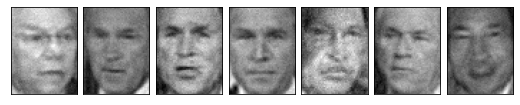

In [21]:
fig, ax = plt.subplots(1, 7, figsize=(9, 5),
                       subplot_kw={'xticks':[], 'yticks':[]},
                       gridspec_kw=dict(hspace=0.1, wspace=0.1))
for i in range(7):
    ax[i].imshow(filtered[i].reshape(62, 47), cmap='binary_r')

##3-c) [2.5 marks]
Repeat 3-b with the  $k$ that it captures 40 % of variance in data and then visiualize the first 7 denoised images. Compare the results of 3-c with 3-b and write your conclusion in 2-3 lines.

In [22]:
# write the denoising code here name the denoised data "filtered"
pca_40 = PCA(0.4).fit(noisy_X)
print('k such that 40 % of variance in data is captured:', pca_40.n_components_)

filtered = pca_40.inverse_transform(pca_40.transform(noisy_X))

k such that 40 % of variance in data is captured: 5


Run the next cell to visualize some of the denoised images.

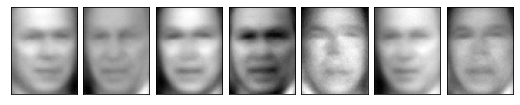

In [23]:
fig, ax = plt.subplots(1, 7, figsize=(9, 5),
                       subplot_kw={'xticks':[], 'yticks':[]},
                       gridspec_kw=dict(hspace=0.1, wspace=0.1))
for i in range(7):
    ax[i].imshow(filtered[i].reshape(62, 47), cmap='binary_r')

Write your conclusion here: With the pca components consisting of the 80% variance, a significant amount of the noise has been removed (since the majority of the noise can will be part of the last few components) but we also lose some of the details.

In the second part, while taking the first five PC (corresponding to the 40% of the variance), we are able to remove most of the noise. However, we also lost a lot of details of the actual images. It looks like a blur.

It can be observed that while denoising, we have to achieve a desired balance/compromise between the tradeoffs of noise reduction and losing significant details.

## Problem 4: tSNE [10 marks]

**Note:** Since tSNE is not covered in the lecture/tutorials, we are simply 
asking you to explore tSNE algorithm implemented in sklearn. You do not
need to implement tSNE alorithm.

In the following the digit dataset is loaded. The images and corresponsing labels are loaded in data and label variables

In [24]:
from sklearn.datasets import load_digits
digits = load_digits()
data=digits.data
label=digits.target
print(data.shape)
print(label.shape)

(1797, 64)
(1797,)


Use PCA and tSNE to obtain two-dimensional repesentations for this dataset. Use plt.scatter function to plot the 2-D representation of this dataset obtained by both PCA and tSNE method. Use labe information to assign distinct colors for data points in different classes. Based on the generated graphs, which one is a better method for visualization?

In [25]:
# Write your code to apply PCA here
pca_digit = PCA(n_components=2)
pca_digit.fit(data)
digit_transform = pca_digit.transform(data)

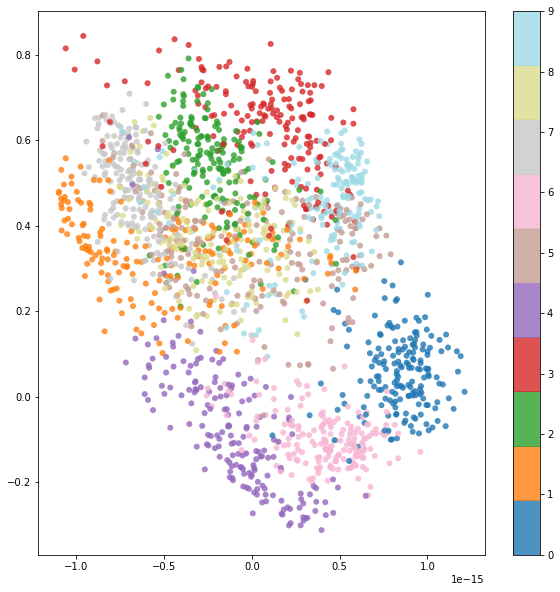

In [26]:
# Write your code to plot the scatter plot for 2-D represntation obtained from PCA here
digit_inverse = pca_digit.inverse_transform(digit_transform)
plt.figure(figsize=(10, 10))
plt.scatter(digit_inverse[:, 0], digit_inverse[:, 1],c=label, edgecolor='none', alpha=0.8,cmap = plt.cm.get_cmap('tab20', 10))
plt.colorbar();

#plt.xlabel('component 1')
#plt.ylabel('component 2')

In [27]:
# Write your code to apply TSNE here
# use TSNE functionality in sklearn.
# Hint: check sklearn.manifold.TSNE
from sklearn.manifold import TSNE
digits_tsne = TSNE(n_components=2, learning_rate='auto',init='random').fit_transform(data)
digits_tsne.shape

(1797, 2)

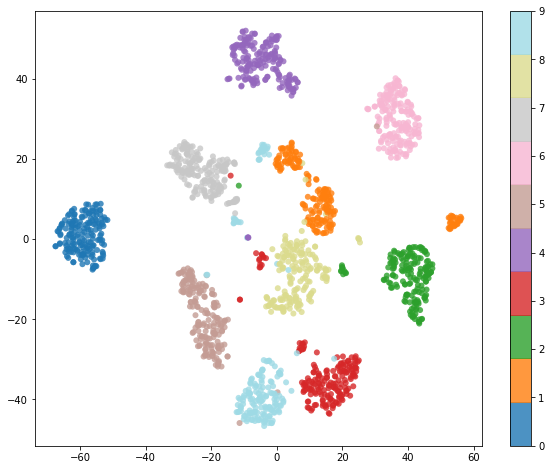

In [28]:
# Write your code to plot the scatter plot for 2-D represntation obtained from TSNE here
plt.figure(figsize=(10, 8))
plt.scatter(digits_tsne[:, 0], digits_tsne[:, 1],c=label, edgecolor='none', alpha=0.8, cmap = plt.cm.get_cmap('tab20', 10))
plt.colorbar();

Wrtie your conclusion about employing PCA and tSNE for data visualization

As seen on the visualization above, tSNE is able to isolate the classes significantly better than via PCA (where are the classes are still overlapping). It can be seen that tSNE is able to find structure that is able to distinguish the digits way better than PCA.

## Problem 5: LDA [10 marks]
In the following the digit dataset once again is loaded. The data points and corresponsing labels are loaded in X and y variables

In [29]:
from sklearn.datasets import load_digits
digits = load_digits()
X=digits.data
y=digits.target

Use PCA and LDA to obtain two-dimensional repesentations for this dataset. Use plt.scatter function to plot the 2-D representation of this dataset obtained by both PCA and LDA methods. Use labe information to assign distinct colors for data points in different classes. Based on the generated graphs, which 2-D representation is more discriminative?

In [30]:
# Write your code to apply PCA here
pca_digit = PCA(n_components=2)
pca_digit.fit(X)
digit_transform = pca_digit.transform(X)

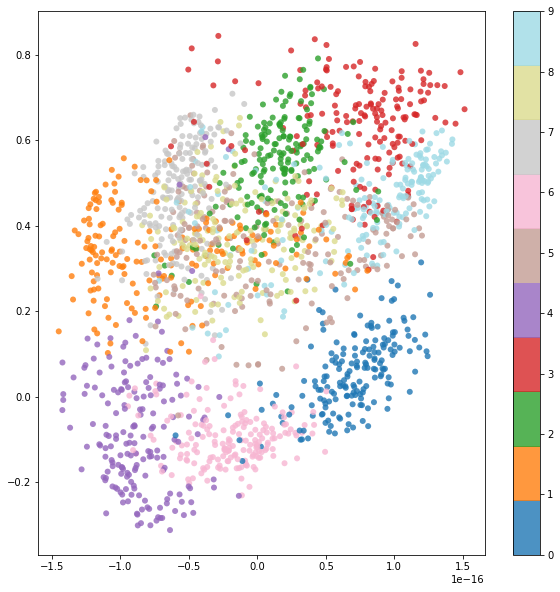

In [31]:
# Write your code to plot the scatter plot for 2-D represntation obtained from PCA here
digit_inverse = pca_digit.inverse_transform(digit_transform)
plt.figure(figsize=(10, 10))
plt.scatter(digit_inverse[:, 0], digit_inverse[:, 1],c=label, edgecolor='none', alpha=0.8, cmap = plt.cm.get_cmap('tab20', 10))
plt.colorbar();

In [32]:
# Write your code to apply LDA here
# Hint: Use LinearDiscriminantAnalysis from sklearn.discriminant_analysis to apply LDA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
lda = LinearDiscriminantAnalysis(n_components=2)
digits_lda = lda.fit(X, y).transform(X)
digits_lda.shape

(1797, 2)

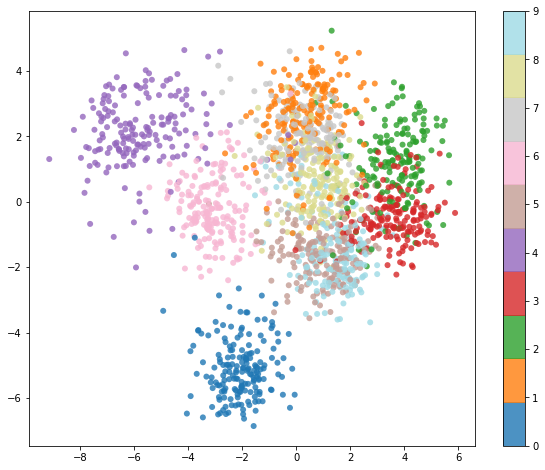

In [33]:
# Write your code to plot the scatter plot for 2-D represntation obtained from LDA here
plt.figure(figsize=(10, 8))
plt.scatter(digits_lda[:, 0], digits_lda[:, 1],c=label, edgecolor='none', alpha=0.8,cmap = plt.cm.get_cmap('tab20', 10))
plt.colorbar();

Wrtie your conclusion about employing PCA and LDA for data dimensionality reduction

From the visualizations above, it can be seen that LDA is able to perform better separability of the data. 

The data is also grouped better in case of LDA.

However, I have intuition that if we use more n_components for the PCA, we will be able to classify the data better using PCA.